# 📊 Data Analysis

In this section, a data analysis is conducted on 5 years of historical stock data for Apple Inc. (AAPL), obtained via the `yfinance` library from Yahoo Finance.

Data augmentation is not applied in this part.


## ⚠️ Disclaimer

> This project is created **for educational and research purposes only**.  
> It does **not** constitute investment advice or financial recommendations.  
> All data is sourced from [Yahoo Finance](https://finance.yahoo.com/) using the `yfinance` Python package.  
> This project is **not affiliated with, endorsed by, or officially connected to Apple Inc.** in any way.

In [34]:
#Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Retrieving 5 years of historical Apple stock data
apple_df = yf.Ticker("AAPL").history(period="5y", interval="1d")

In [36]:
apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-27 00:00:00-04:00,61.337120,62.094278,59.953851,60.121300,204216800,0.0,0.0
2020-03-30 00:00:00-04:00,60.849342,62.009348,60.524149,61.837044,167976400,0.0,0.0
2020-03-31 00:00:00-04:00,62.028762,63.700817,61.155116,61.710850,197002000,0.0,0.0
2020-04-01 00:00:00-04:00,59.820377,60.359125,58.031834,58.463802,176218400,0.0,0.0
2020-04-02 00:00:00-04:00,58.325477,59.492763,57.490661,59.439373,165934000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-21 00:00:00-04:00,211.559998,218.839996,211.279999,218.270004,94127800,0.0,0.0
2025-03-24 00:00:00-04:00,221.000000,221.479996,218.580002,220.729996,44299500,0.0,0.0
2025-03-25 00:00:00-04:00,220.770004,224.100006,220.080002,223.750000,34493600,0.0,0.0


In [37]:
apple_df.info() #Getting info about dataset
apple_df.isnull().sum() #Checking NaN values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-03-27 00:00:00-04:00 to 2025-03-27 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1257 non-null   float64
 1   High          1257 non-null   float64
 2   Low           1257 non-null   float64
 3   Close         1257 non-null   float64
 4   Volume        1257 non-null   int64  
 5   Dividends     1257 non-null   float64
 6   Stock Splits  1257 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [38]:
apple_df.describe() #Statistical Summary

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000
mean,159.485493,161.235108,157.846636,159.631248,8.380106e+07,0.003644,0.003182
std,41.284525,41.545622,41.055489,41.345127,4.374367e+07,0.028734,0.112822
min,58.325477,59.492763,57.490661,58.463802,2.323470e+07,0.000000,0.000000
25%,132.003819,133.013442,130.379927,131.573380,5.362390e+07,0.000000,0.000000
50%,157.244239,159.351602,154.977094,156.937073,7.304660e+07,0.000000,0.000000
75%,183.120556,184.913209,181.639459,183.416183,9.938220e+07,0.000000,0.000000
max,257.906429,259.814335,257.347047,258.735504,3.743368e+08,0.250000,4.000000


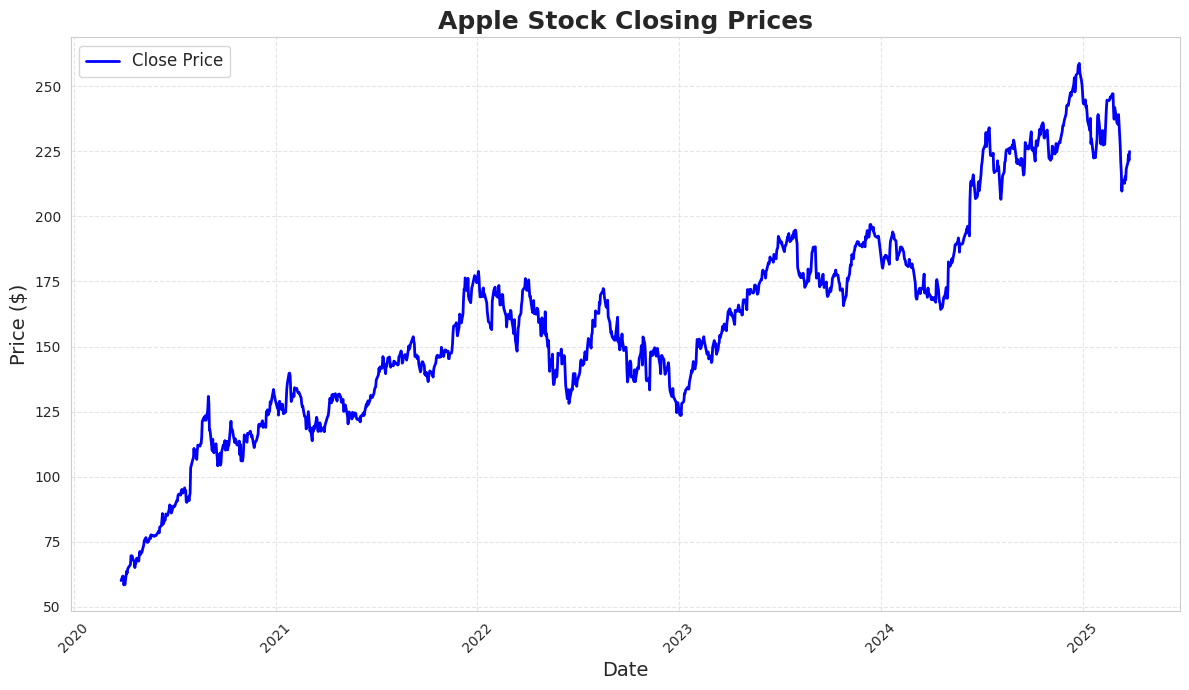

In [39]:
#Apple stock closing prices are plotted.
plt.figure(figsize=(12,7))
plt.plot(apple_df.index, apple_df['Close'], label='Close Price', color='blue', linewidth=2)
plt.title("Apple Stock Closing Prices", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)

plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [41]:
#Daily changes are added to dataframe
apple_df['Daily Return'] = apple_df['Close'].pct_change()

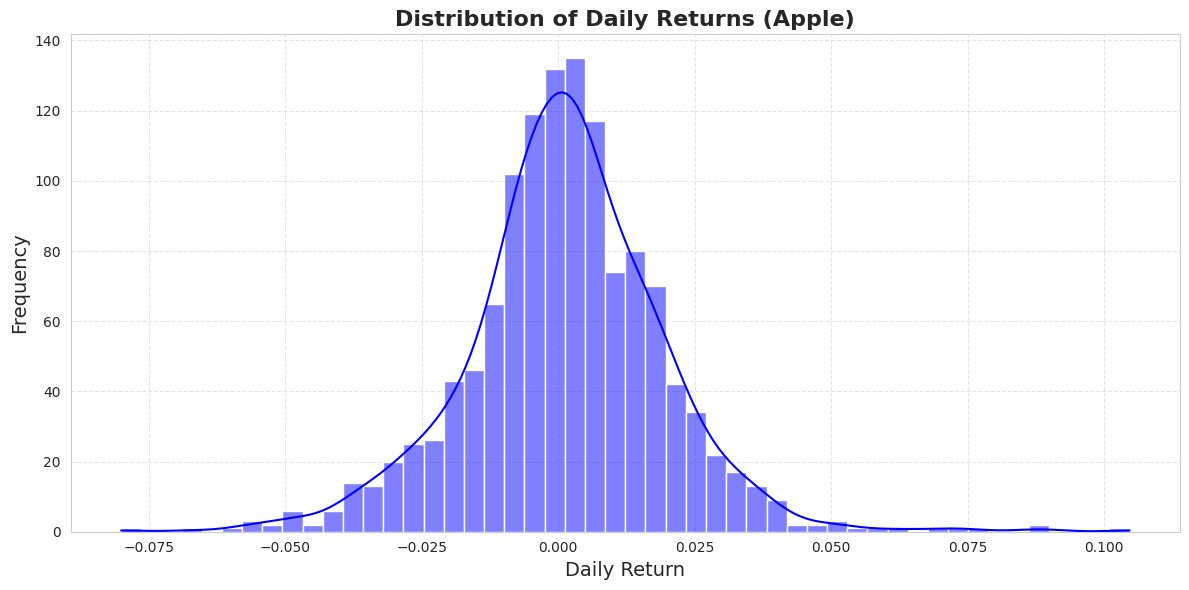

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(apple_df['Daily Return'].dropna(), bins=50, kde=True, color='blue')
plt.title("Distribution of Daily Returns (Apple)", fontsize=16, fontweight='bold')
plt.xlabel("Daily Return", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [46]:
#Moving averages of the daily close
apple_df['MA20'] = apple_df['Close'].rolling(window=20).mean()
apple_df['MA50'] = apple_df['Close'].rolling(window=50).mean()

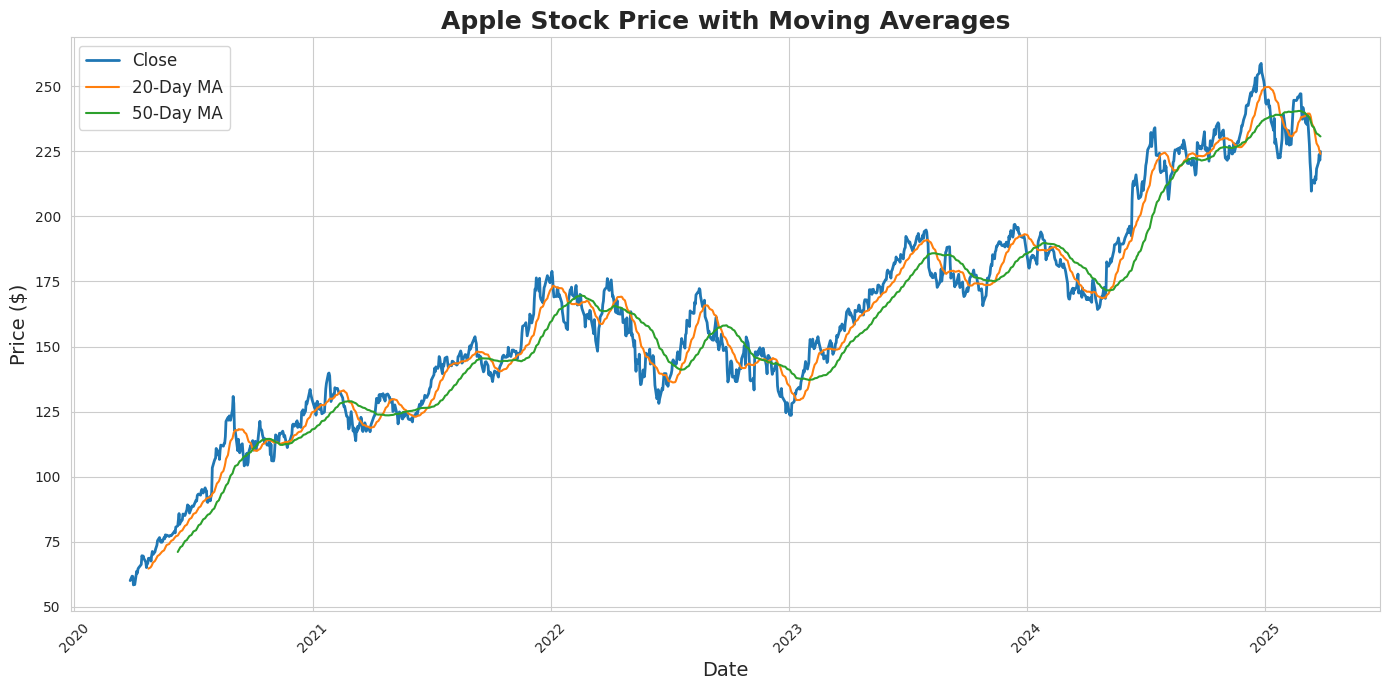

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))

sns.lineplot(data=apple_df, x=apple_df.index, y='Close', label='Close', linewidth=2)
sns.lineplot(data=apple_df, x=apple_df.index, y='MA20', label='20-Day MA', linewidth=1.5)
sns.lineplot(data=apple_df, x=apple_df.index, y='MA50', label='50-Day MA', linewidth=1.5)

plt.title("Apple Stock Price with Moving Averages", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

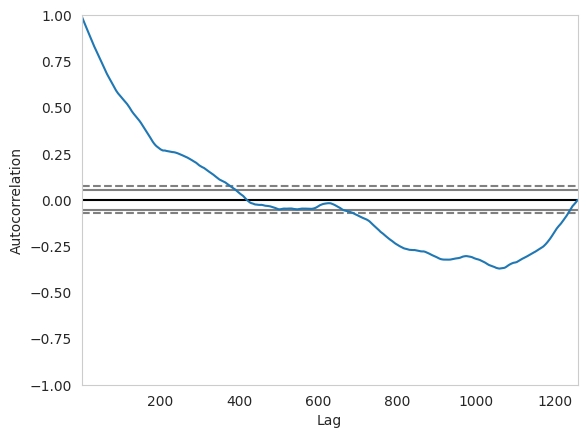

In [48]:
from pandas.plotting import autocorrelation_plot
# Displays the autocorrelation of the closing prices to identify patterns, trends or seasonality.
autocorrelation_plot(apple_df['Close'])

<Axes: xlabel='Date', ylabel='Volume'>

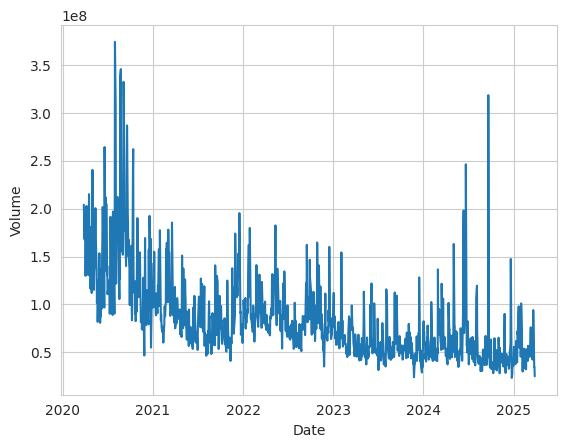

In [49]:
# Visualizing trading volume over time to detect spikes in investor activity or market interest
sns.lineplot(data=apple_df, x=apple_df.index, y='Volume')

In [50]:
#Creating a new column to writing days
apple_df['Weekday'] = apple_df.index.day_name()

<Axes: xlabel='Weekday', ylabel='Daily Return'>

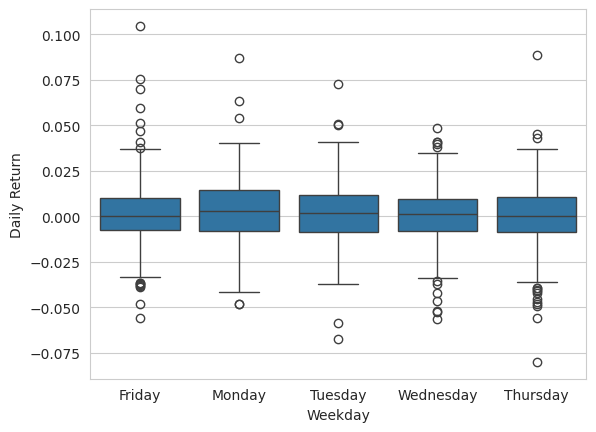

In [51]:
# Showing the distribution of daily returns for each weekday
sns.boxplot(x='Weekday', y='Daily Return', data=apple_df)

In [55]:
# Calculatimh the 20-day rolling volatility of Apple stock based on daily returns
apple_df['Volatility'] = apple_df['Daily Return'].rolling(window=20).std()

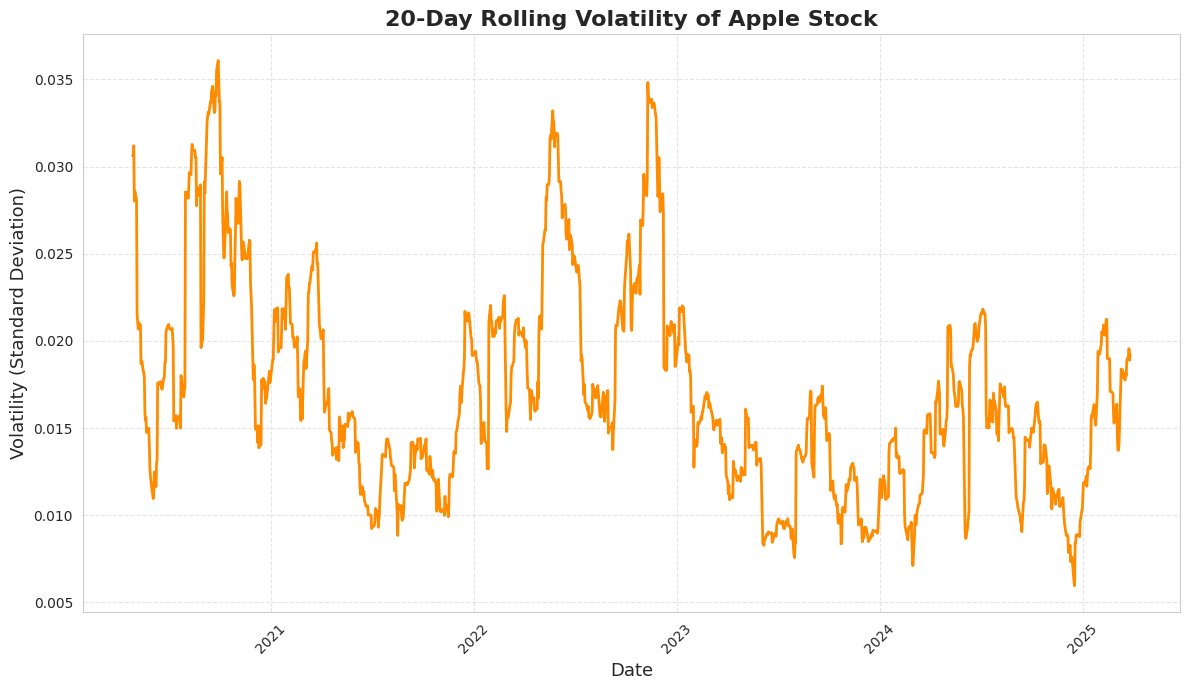

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))
sns.lineplot(data=apple_df, x=apple_df.index, y='Volatility', color='darkorange', linewidth=2)

plt.title("20-Day Rolling Volatility of Apple Stock", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=13)
plt.ylabel("Volatility (Standard Deviation)", fontsize=13)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()